In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"C:\Users\AMIT\Downloads\archive\zara.csv", sep=';')
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


Checking columns,rows and Data type

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

Checking null values

In [20]:

df.isnull().sum()
#found!!

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

Checking duplicates


In [23]:
df.duplicated().value_counts()
#not found

False    252
Name: count, dtype: int64

Checking datatype

In [ ]:
df.dtypes
#why scraped at is object? isnt it is date?

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
sku                  object
name                 object
description          object
price               float64
currency             object
scraped_at           object
terms                object
section              object
dtype: object

Checking Valid entries or outliers


In [45]:
df['price'].describe()
#max = 439, when mean is 86, suspecious
df.loc[df['price'] == 439]
#ok nothing wrong

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN


In [ ]:
df['price'].isna().value_counts()
df['price'].isnull().value_counts()
#nothing wrong

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [49]:
df['Sales Volume'].describe()
df['Sales Volume'].isna().value_counts()
df['Sales Volume'].isnull().value_counts()
#nothing wrong

Sales Volume
False    252
Name: count, dtype: int64

In [26]:
df.head(1)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN


Cleaning missing data

In [67]:
#removing row which has NaN in name and in description.
df.drop(index=72, inplace=True)

In [92]:
#filling NaN description with product name
name = df.loc[df.index==60, 'name']
df.loc[df.index==60, 'description'] = name
df.loc[df.index==60]


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,VINTAGE EFFECT LEATHER BOMBER JACKET,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN


Url and Sku column are redundant, lets remove it

In [96]:
df.drop(columns=['url', 'sku'], inplace=True)

Scraped_at is too messy and confusing as it also contain date, so let clean it and make a proper date column

In [112]:
df['scraped_at'] = df['scraped_at'].str[:10]
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19,jackets,MAN


Analysis

1.which product used promotion

In [57]:
a= df.loc[df['Promotion'] == 'Yes']
b= a.groupby('terms')['Sales Volume'].sum()

#total 119 products

(0.0, 150000.0)

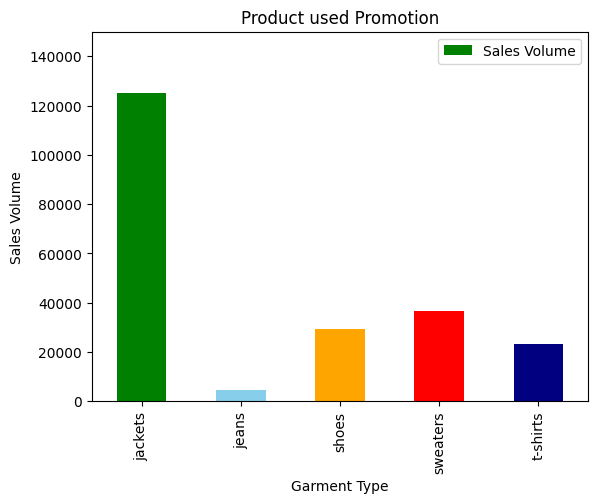

In [58]:
b.plot.bar(color=['green', 'skyblue', 'orange', 'red', 'navy'])
plt.title('Product used Promotion')
plt.xlabel('Garment Type')
plt.ylabel('Sales Volume')
plt.legend()
plt.ylim(0,150000)

2. Product used promotion and they are seasonal also

In [63]:
a = df.loc[(df['Promotion'] == 'Yes') & (df['Seasonal'] == 'Yes')]
b= a.groupby('terms')['Sales Volume'].sum()

#total 61 products

(0.0, 100000.0)

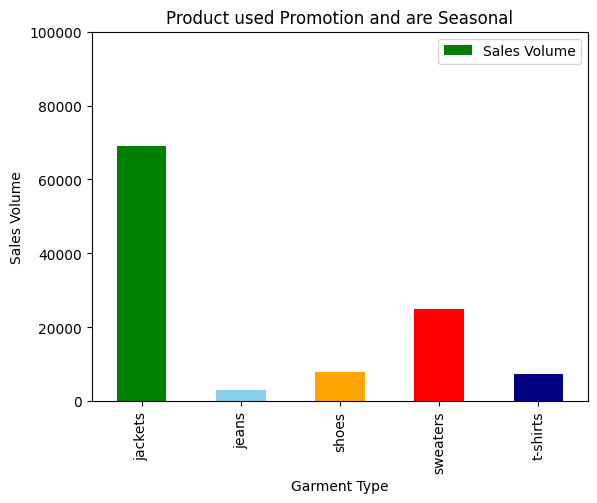

In [65]:
b.plot.bar(color=['green', 'skyblue', 'orange', 'red', 'navy'])
plt.title('Product used Promotion and are Seasonal')
plt.xlabel('Garment Type')
plt.ylabel('Sales Volume')
plt.legend()
plt.ylim(0,100000)

3. Product which sold highest among all

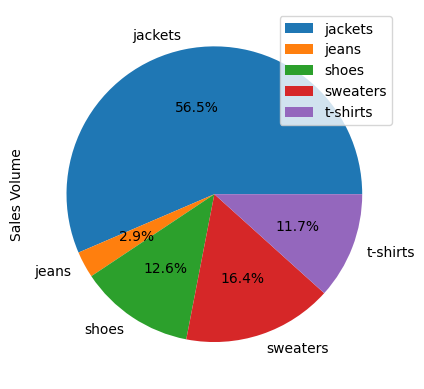

In [70]:
df.loc[df['Sales Volume'] == df['Sales Volume'].max()]
a = df.groupby('terms')['Sales Volume'].sum()
a.plot.pie(autopct='%1.1f%%')
plt.legend()
#product - PLAID TIE DYE OVERSHIRT

4. Products which have sales volume more than 2500

In [71]:
df.loc[df['Sales Volume'] >2500].head()
# 51 entries

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
5,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-...,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN
10,113143,Aisle,Yes,Clothing,Yes,2663,Zara,https://www.zara.com/us/en/herringbone-texture...,316207900-710-2,HERRINGBONE TEXTURED JACKET,Jacket made of wool blend fabric. Lapel collar...,129.00,USD,2024-02-19T08:50:12.011296,jackets,MAN
27,187234,Front of Store,Yes,Clothing,Yes,2575,Zara,https://www.zara.com/us/en/stretch-pocket-over...,342657802-914-2,STRETCH POCKET OVERSHIRT,Overshirt made of stretchy fabric. Lapel colla...,59.90,USD,2024-02-19T08:50:21.681257,jackets,MAN


5.Products which have sales volume more than 2500 and price is morethan $100

In [88]:
df.query("`Sales Volume`>= 2500 and `price`>100")
#OR
a = df.loc[
    (df['Sales Volume'] > 2500) &
    (df['price'] > 100.0)
]

# total 14 products

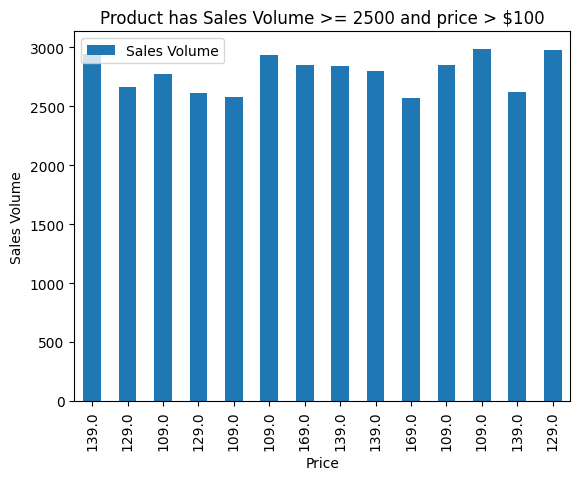

In [89]:
a.plot.bar(x='price', y='Sales Volume')
plt.title('Product has Sales Volume >= 2500 and price > $100')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.legend()

6. Products which have sales volume more than 2500, price is morethan $100, it is seasonal and used promotion

In [151]:
df.query("`Sales Volume`> 2500 and `price`>100 and `Promotion`=='Yes' and `Seasonal`=='Yes'")
#3 products

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,description,price,currency,scraped_at,terms,section
10,113143,Aisle,Yes,Clothing,Yes,2663,Zara,HERRINGBONE TEXTURED JACKET,Jacket made of wool blend fabric. Lapel collar...,129.0,USD,2024-02-19,jackets,MAN
100,138779,Front of Store,Yes,Clothing,Yes,2801,Zara,SLIM FIT SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,139.0,USD,2024-02-19,jackets,MAN
243,172015,End-cap,Yes,Clothing,Yes,2622,Zara,FAUX LEATHER BOMBER JACKET,Cropped overshirt. Lapel collar and long sleev...,139.0,USD,2024-02-19,t-shirts,MAN


In [156]:
#or we can also analyse like this (below):
df.loc[
    (df['Sales Volume'] > 2500) &
    (df['price'] > 100.0) &
    (df['Promotion'] == 'Yes') &
    (df['Seasonal'] == 'Yes')
]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,description,price,currency,scraped_at,terms,section
10,113143,Aisle,Yes,Clothing,Yes,2663,Zara,HERRINGBONE TEXTURED JACKET,Jacket made of wool blend fabric. Lapel collar...,129.0,USD,2024-02-19,jackets,MAN
100,138779,Front of Store,Yes,Clothing,Yes,2801,Zara,SLIM FIT SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,139.0,USD,2024-02-19,jackets,MAN
243,172015,End-cap,Yes,Clothing,Yes,2622,Zara,FAUX LEATHER BOMBER JACKET,Cropped overshirt. Lapel collar and long sleev...,139.0,USD,2024-02-19,t-shirts,MAN


7. Which type of Product position has the highest sales volume and calculate mean


In [97]:
a = df.groupby('Product Position')['Sales Volume'].agg(['sum', 'max', 'mean'])
a
# Aisle position and highest sales volume of a product is at aisle position

,sum,max,mean
Product Position,,,
Aisle,177396,2989,1828.824742
End-cap,152930,2968,1778.255814
Front of Store,129247,2870,1873.144928


Text(0, 0.5, 'Sales Volume')

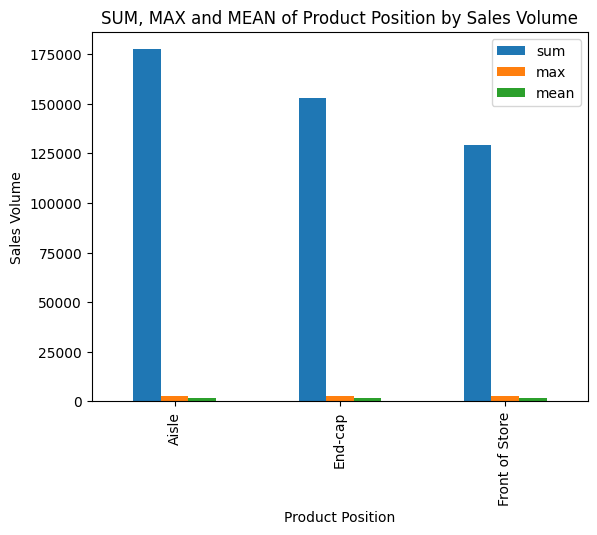

In [101]:
a.plot.bar()
plt.title('SUM, MAX and MEAN of Product Position by Sales Volume')
plt.legend()
plt.ylabel('Sales Volume')

8. Top 20 highest selling products type

In [127]:
a = df.sort_values(by='Sales Volume', ascending=False).head(20)
b= a.groupby('terms')['Sales Volume'].sum()
# here six products are jackets

Text(0, 0.5, 'Product Sold')

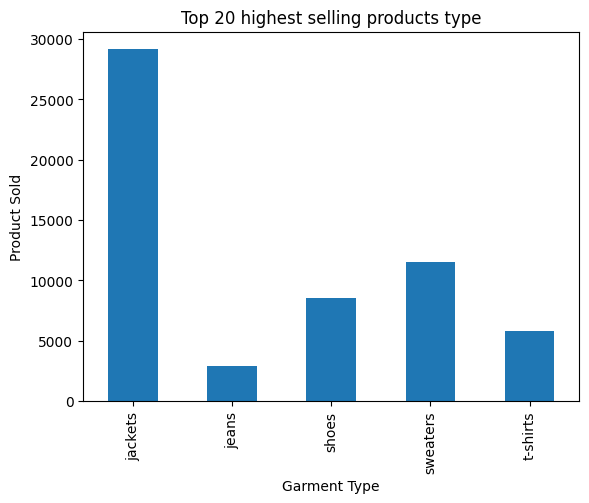

In [128]:
b.plot.bar()
plt.title('Top 20 highest selling products type')
plt.xlabel('Garment Type')
plt.ylabel('Product Sold')

9. Top 10 lowest selling products

In [129]:
a = df.sort_values(by='Sales Volume').head(20)
b= a.groupby('terms')['Sales Volume'].sum()
# here 5 products are sweaters

Text(0, 0.5, 'Product Sold')

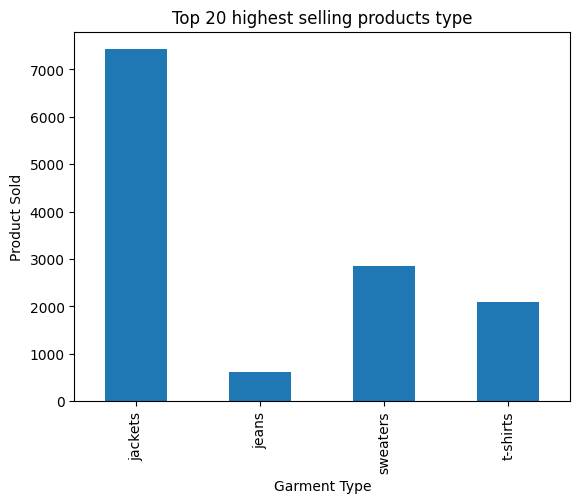

In [130]:
b.plot.bar()
plt.title('Top 20 highest selling products type')
plt.xlabel('Garment Type')
plt.ylabel('Product Sold')